In [3]:
import cs109style
cs109style.customize_mpl()
cs109style.customize_css()

# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import requests
from pattern import web



Setting custom matplotlib visual style
Setting custom CSS for the IPython Notebook


C:\Users\rlochavillo\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Fetching population data from Wikipedia

In this example we will fetch data about countries and their population from Wikipedia.

http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population has several tables for individual countries, subcontinents as well as different years. We will combine the data for all countries and all years in a single panda dataframe and visualize the change in population for different countries.

###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

## Fetching the Wikipedia site

In [4]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
website_html = requests.get(url).text
#print website_html

## Parsing html data

In [6]:
def get_population_html_tables(html):
    """Parse html and return html tables of wikipedia population data."""

    dom = web.Element(html)

    ### 0. step: look at html source!
    
    #### 1. step: get all tables

    #### 2. step: get all tables we care about
    tbls = [t for t in dom.by_tag('table') if t.attributes['class'] == 'sortable wikitable']

    return tbls

tables = get_population_html_tables(website_html)
print "table length: %d" %len(tables)
for t in tables:
    print t.attributes


table length: 3
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}


In [9]:
def table_type(tbl):
    ### Extract the table type
    headers = tbl.by_tag('th')
    return headers[1].content

# group the tables by type
tables_by_type = defaultdict(list)  # defaultdicts have a default value that is inserted when a new key is accessed
for tbl in tables:
    tables_by_type[table_type(tbl)].append(tbl)

print tables_by_type

defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


## Extracting data and filling it into a dictionary

In [51]:
def get_countries_population(tables):
    """Extract population data for countries from all tables and store it in dictionary."""
    
    result = defaultdict(dict)

    # 1. step: try to extract data for a single table

    # 2. step: iterate over all tables, extract headings and actual data and combine data into single dict
    
    for tbl in tables:
        #store headers in a list
        headers = [th.content for th in tbl.by_tag('th')]
        index_years = [(index, int(header)) for index, header in enumerate(headers) if header.isnumeric()]
        
        #iterate over each row and store as data
        rows = [tr for tr in tbl('tr') if tr('td')]
        for row in rows:
            r = [td('b')[0] if td('b') else td for td in row('td')]
            country = r[1]('a')[0].content
            for i, y in index_years:
                result[country][y] = int(r[i].content.encode('ascii').replace(',',''))/1000.0
    
    return result

result = get_countries_population(tables_by_type['Country (or dependent territory)'])
print result

defaultdict(<type 'dict'>, {u'Canada': {1985: 25.942, 2050: 41.136, 1955: 16.051, 2020: 36.388, 1990: 27.791, 1960: 18.267, 2025: 37.559, 1995: 29.691, 1965: 20.072, 2030: 38.565, 2000: 31.1, 1970: 21.75, 2035: 39.396, 2005: 32.387, 1975: 23.21, 2040: 40.071, 2010: 33.76, 1980: 24.594, 2045: 40.636, 1950: 14.012, 2015: 35.1}, u'Saint Martin': {1985: 0.016, 2050: 0.035, 1955: 0.004, 2020: 0.033, 1990: 0.031, 1960: 0.005, 2025: 0.034, 1995: 0.033, 1965: 0.005, 2030: 0.034, 2000: 0.029, 1970: 0.006, 2035: 0.034, 2005: 0.028, 1975: 0.007, 2040: 0.035, 2010: 0.031, 1980: 0.008, 2045: 0.035, 1950: 0.003, 2015: 0.032}, u'Guernsey': {1985: 0.056, 2050: 0.067, 1955: 0.047, 2020: 0.068, 1990: 0.063, 1960: 0.047, 2025: 0.068, 1995: 0.061, 1965: 0.051, 2030: 0.069, 2000: 0.062, 1970: 0.054, 2035: 0.068, 2005: 0.064, 1975: 0.054, 2040: 0.068, 2010: 0.065, 1980: 0.054, 2045: 0.068, 1950: 0.046, 2015: 0.067}, u'Lithuania': {1985: 3.588, 2050: 1.802, 1955: 2.615, 2020: 2.732, 1990: 3.684, 1960: 2.765,

## Creating a dataframe from a dictionary

In [59]:
# create dataframe

df = pd.DataFrame.from_dict(result, orient='index')
# sort based on year
df.sort(axis=1,inplace=True)
print df


                                  1985      2050      1955      2020  \
Afghanistan                     13.120    63.796     8.892    36.644   
Albania                          2.957     2.825     1.393     3.075   
Algeria                         22.009    55.445     9.842    42.973   
American Samoa                   0.039     0.050     0.020     0.054   
Andorra                          0.045     0.075     0.007     0.086   
Angola                           8.390    45.889     4.424    22.485   
Anguilla                         0.007     0.027     0.006     0.019   
Antigua and Barbuda              0.065     0.123     0.052     0.099   
Argentina                       30.672    53.512    18.928    45.379   
Armenia                          3.465     2.469     1.566     3.022   
Aruba                            0.062     0.151     0.054     0.120   
Australia                       15.696    29.013     9.278    23.939   
Austria                          7.560     9.108     6.947     8

## Some data accessing functions for a panda dataframe

In [60]:
subtable = df.iloc[0:2, 0:2]
print "subtable"
print subtable
print ""

column = df[1955]
print "column"
print column
print ""

row = df.ix[0] #row 0
print "row"
print row
print ""

rows = df.ix[:2] #rows 0,1
print "rows"
print rows
print ""

element = df.ix[0,1955] #element
print "element"
print element
print ""

# max along column
print "max"
print df[1950].max()
print ""

# axes
print "axes"
print df.axes
print ""

row = df.ix[0]
print "row info"
print row.name
print row.index
print ""

countries =  df.index
print "countries"
print countries
print ""

print "Austria"
print df.ix['Austria']

subtable
               1985    2050
Afghanistan  13.120  63.796
Albania       2.957   2.825

column
Afghanistan                        8.892
Albania                            1.393
Algeria                            9.842
American Samoa                     0.020
Andorra                            0.007
Angola                             4.424
Anguilla                           0.006
Antigua and Barbuda                0.052
Argentina                         18.928
Armenia                            1.566
Aruba                              0.054
Australia                          9.278
Austria                            6.947
Azerbaijan                         3.314
Bahamas                            0.088
Bahrain                            0.131
Bangladesh                        49.589
Barbados                           0.228
Belarus                            7.781
Belgium                            8.869
Belize                             0.077
Benin                              1.8

## Plotting population of 4 countries

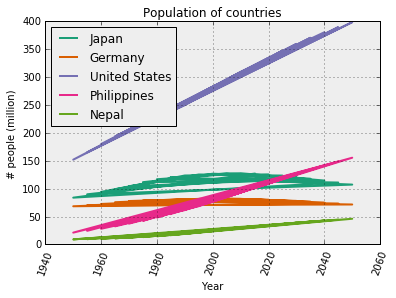

In [62]:
plotCountries = ['Japan', 'Germany', 'United States', 'Philippines', 'Nepal']
    
for country in plotCountries:
    row = df.ix[country]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0) # start y axis at 0

plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("# people (million)")
plt.title("Population of countries")

## Plot 5 most populous countries from 2010 and 2060

C:\Users\rlochavillo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


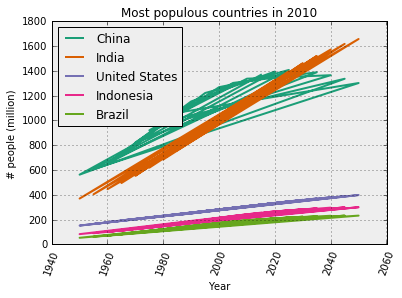

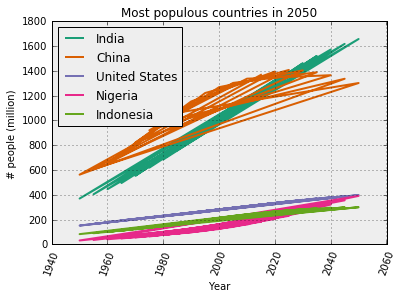

In [64]:
def plot_populous(df, year):
    # sort table depending on data value in year column
    df_by_year = df.sort(year, ascending=False)
    
    plt.figure()
    for i in range(1, 6):  
        row = df_by_year.ix[i]
        plt.plot(row.index, row, label=row.name ) 
            
    plt.ylim(ymin=0)
    
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("# people (million)")
    plt.title("Most populous countries in %d" % year)

plot_populous(df, 2010)
plot_populous(df, 2050)